In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 로컬 컴퓨터에 저장되어 있는 경우 상위폴더에 dataset 폴더 형성 후 데이터를 집어 넣으면 됨
# path = '../dataset/'

# csv 파일 불러오기

In [ ]:
# 로컬 컴퓨터에 저장되어 있는 경우
# data = pd.read_csv(path+'iris.csv')
# data

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 1. 분산분석

## 1-1 일원분산분석 (One-way ANOVA)

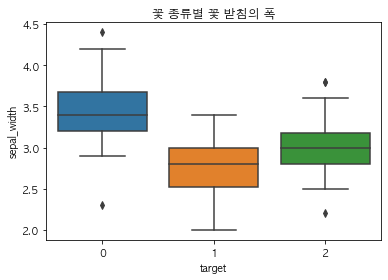

In [7]:
sns.boxplot(x='target', y= 'sepal_width', data=data)
plt.title('꽃 종류별 꽃 받침의 폭')
plt.show()

In [8]:
# 정규성 검정
# 귀무가설 : 정규분포를 따른다.
from  scipy.stats import shapiro

for i in range(3):
    p_value = shapiro(data.sepal_width[data.target==i])[1]
    if p_value < 0.05:
        print('정규분포를 따른다는 귀무가설을 유의수준 5%에서 기각할 수 있습니다. 따라서 정규성을 충족하지 못합니다.')
    else:
        print('정규분포를 따른다는 귀무가설을 유의수준 5%에서 기각할 수 없습니다. 따라서 정규성을 충족합니다.')
    

정규분포를 따른다는 귀무가설을 유의수준 5%에서 기각할 수 없습니다. 따라서 정규성을 충족합니다.
정규분포를 따른다는 귀무가설을 유의수준 5%에서 기각할 수 없습니다. 따라서 정규성을 충족합니다.
정규분포를 따른다는 귀무가설을 유의수준 5%에서 기각할 수 없습니다. 따라서 정규성을 충족합니다.


In [9]:
#등분산성 확인 - 레빈 검증 (귀무가설 : 등분산의 특징이 있다.)
from scipy.stats import levene
print(levene(data.sepal_width[data.target==0],
             data.sepal_width[data.target==1],
             data.sepal_width[data.target==2]))

#등분산성 확인 - 바틀렛 검증 (귀무가설 : 등분산의 특징이 있다.)
from scipy.stats import bartlett
print(bartlett(data.sepal_width[data.target==0],
               data.sepal_width[data.target==1],
               data.sepal_width[data.target==2]))

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)
BartlettResult(statistic=2.0910752014392338, pvalue=0.35150280041580323)


In [10]:
# 꽃 종류가 sepal_width에 어떤 영향을 미치는지 그룹별 변동과 그룹내 변동을 구하여 ANOVA를 시행한다.
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm, anova_single

model = ols('sepal_width ~ C(target)', data).fit()

anova_table = anova_lm(model)

if anova_table['PR(>F)'][0] < 0.05:
    print(f'ANOVA 분석 결과, 5%의 유의수준으로 모든 수준에서 모평균이 동일하다는 귀무가설을 기각할 수 있습니다. 따라서 위 집단의 모평균이 다르다고 말할 수 있습니다.')
else:
    print(f'ANOVA 분석 결과, 5%의 유의수준으로 모든 수준에서 모평균이 동일하다는 귀무가설을 기각할 수 없습니다.')
    
anova_table

ANOVA 분석 결과, 5%의 유의수준으로 모든 수준에서 모평균이 동일하다는 귀무가설을 기각할 수 있습니다. 따라서 위 집단의 모평균이 다르다고 말할 수 있습니다.


,df,sum_sq,mean_sq,F,PR(>F)
C(target),2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     49.16
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           4.49e-17
Time:                        12:14:42   Log-Likelihood:                -49.366
No. Observations:                 150   AIC:                             104.7
Df Residuals:                     147   BIC:                             113.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4280      0.048     71.

## 1-2 이원분산분석 (Two-way ANOVA)

In [12]:
multi_model=ols('sepal_length ~ C(target) + sepal_width + petal_length + petal_width', data).fit()
anova_lm(multi_model, typ=2)

,sum_sq,df,F,PR(>F)
C(target),0.888920,2.0,4.721152,1.032884e-02
sepal_width,3.125004,1.0,33.194491,4.867516e-08
petal_length,13.785343,1.0,146.430978,1.073592e-23
petal_width,0.409029,1.0,4.344799,3.888826e-02
Residual,13.556485,144.0,NaN,NaN


In [13]:
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     188.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):           2.67e-61
Time:                        12:14:43   Log-Likelihood:                -32.558
No. Observations:                 150   AIC:                             77.12
Df Residuals:                     144   BIC:                             95.18
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.1713      0.280      7.

# 2. 판별분석

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import train_test_split

# 훈련, 검정셋 분리
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='target'), data['target'],
                                                    test_size = 0.25, shuffle=True, random_state=2022)

# 훈련, 검정셋의 행열 값 출력
for i in [X_train, y_train, X_test, y_test]:
    print(i.shape)

# 판별분석 시행
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X=X_train, y=y_train)
lda_X_train = lda.transform(X_train) 

(112, 4)
(112,)
(38, 4)
(38,)


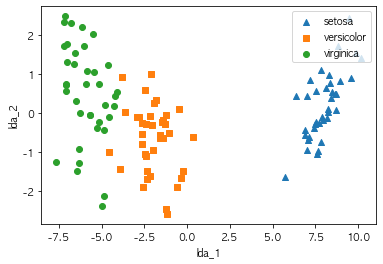

In [15]:
# 판별분석이 적용된 데이터에 대해 데이터프레임 형성
lda_cols = ["lda_1", "lda_2"] 
df = pd.DataFrame(data=lda_X_train, columns=lda_cols) 
df["target"] = y_train.values

# 산점도를 그리기 위해 라벨값, 마커 모양 설정
markers=["^", "s", "o"] 
label_name = ['setosa', 'versicolor', 'virginica']

# 산점도 그리기
for i, marker in enumerate(markers): 
    x_data = df[df["target"]==i]["lda_1"] 
    y_data = df[df["target"]==i]["lda_2"] 
    plt.scatter(x_data, y_data, marker=marker, label=label_name[i]) 
    
plt.legend(loc="upper right") 
plt.xlabel("lda_1") 
plt.ylabel("lda_2") 
plt.show()

In [16]:
# 라이브러리 호출
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 판별분석 모델을 통해 X_test를 입력하여 y값 예측 시행
y_pred = lda.predict(X_test)

# 혼동행렬 생성
cf = confusion_matrix(y_test, y_pred)

# 혼동행렬 및 결과 리포트 수행
print(f'혼동행렬\n{cf}\n')
print(classification_report(y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica']))

혼동행렬
[[13  0  0]
 [ 0 12  0]
 [ 0  1 12]]

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

